# Distortions and Pricing Examples

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')
import logging
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

In [3]:
# this file is in examples
from importlib import reload
import sys
sys.path.insert(0,'..')
import aggregate as agg

import aggregate.parser as parser
import aggregate.underwriter as trash

uw = trash.Underwriter(debug=False)

In [38]:
oneyear= '''AAA 49.50 0.06 63.86 0.18 70.47 0.33 73.95 0.61
AA 58.97 1.24 71.22 1.44 82.36 1.86 88.57 2.70
A 88.82 1.12 102.91 2.78 110.71 4.71 117.52 7.32
BBB 168.99 12.48 170.89 20.12 185.34 27.17 179.63 34.56
BB 421.20 103.09 364.55 126.74 345.37 140.52 322.32 148.05
B 760.84 426.16 691.81 400.52 571.94 368.38 512.43 329.40'''

In [39]:
oy = oneyear.split('\n')
oyo = [i.split(' ') for i in oy]
df = pd.DataFrame(oyo, columns=['rating', 's_13', 'el_13', 's_35', 'el_35', 's_57', 'el_57', 's_710', 'el_710'], dtype=float)
df = df.set_index('rating')
df = df.sort_index(axis=1)
df.columns = pd.MultiIndex.from_product((('el', 'spread'), ('1-3', '3-5', '5-7', '7-10')), names=['type', 'maturity'])
df

type          el                          spread                        
maturity     1-3     3-5     5-7    7-10     1-3     3-5     5-7    7-10
rating                                                                  
AAA         0.06    0.18    0.33    0.61   49.50   63.86   70.47   73.95
AA          1.24    1.44    1.86    2.70   58.97   71.22   82.36   88.57
A           1.12    2.78    4.71    7.32   88.82  102.91  110.71  117.52
BBB        12.48   20.12   27.17   34.56  168.99  170.89  185.34  179.63
BB        103.09  126.74  140.52  148.05  421.20  364.55  345.37  322.32
B         426.16  400.52  368.38  329.40  760.84  691.81  571.94  512.43

In [40]:
for m in ('1-3', '3-5', '5-7', '7-10'):
    df[('lr', m)] = df[('el', m)] / df[('spread', m)]
df

type          el                          spread                          \
maturity     1-3     3-5     5-7    7-10     1-3     3-5     5-7    7-10   
rating                                                                     
AAA         0.06    0.18    0.33    0.61   49.50   63.86   70.47   73.95   
AA          1.24    1.44    1.86    2.70   58.97   71.22   82.36   88.57   
A           1.12    2.78    4.71    7.32   88.82  102.91  110.71  117.52   
BBB        12.48   20.12   27.17   34.56  168.99  170.89  185.34  179.63   
BB        103.09  126.74  140.52  148.05  421.20  364.55  345.37  322.32   
B         426.16  400.52  368.38  329.40  760.84  691.81  571.94  512.43   

type            lr                                
maturity       1-3       3-5       5-7      7-10  
rating                                            
AAA       0.001212  0.002819  0.004683  0.008249  
AA        0.021028  0.020219  0.022584  0.030484  
A         0.012610  0.027014  0.042544  0.062287  
BBB       0.073851  0.117737  0.146595  0.192395  
BB        0.244753  0.347662  0.406868  0.459326  
B         0.560118  0.578945  0.644089  0.642820

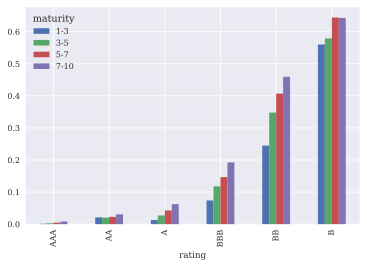

In [41]:
df['lr'].plot(kind='bar')

,el,spread
rating,,
AAAA,0.000000,0.000000
AAA,0.000006,0.004950
A,0.000112,0.008882
AA,0.000124,0.005897
BBB,0.001248,0.016899
BB,0.010309,0.042120
B,0.042616,0.076084


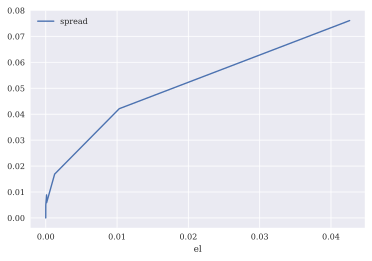

In [42]:
temp = df.loc[:, [('el', '1-3'), ('spread', '1-3')]] / 10000
temp.columns =['el', 'spread']
temp.loc['AAAA', :] = (0,0)
# temp.loc['Z', :] = (1,1)
temp = temp.sort_values('el')
temp.plot(x='el', y='spread')
temp

[7 0]          el  spread
rating             
Z       1.0     1.0
AAAA    0.0     0.0 


[6 7]               el    spread
rating                    
B       0.042616  0.076084
Z       1.000000  1.000000 


[5 6]               el    spread
rating                    
BB      0.010309  0.042120
B       0.042616  0.076084 


[4 5]               el    spread
rating                    
BBB     0.001248  0.016899
BB      0.010309  0.042120 


[2 4]               el    spread
rating                    
A       0.000112  0.008882
BBB     0.001248  0.016899 


[1 0]               el   spread
rating                   
AAA     0.000006  0.00495
AAAA    0.000000  0.00000 


[1 2]               el    spread
rating                    
AAA     0.000006  0.004950
A       0.000112  0.008882 




(0, 0.1)

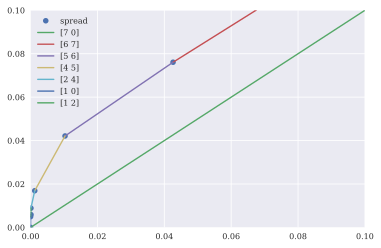

In [53]:
from scipy.spatial import ConvexHull
temp.loc['Z', : ] = (1,1)
hull = ConvexHull(temp)

plt.plot(temp.el, temp.spread, 'o')
for simplex in hull.simplices:
    print(simplex, temp.iloc[simplex, :], '\n\n')
    plt.plot(temp.iloc[simplex, 0], temp.iloc[simplex, 1], '-', label=simplex)
plt.legend()
plt.xlim(0, .1)
plt.ylim(0, .1)

In [49]:
temp.iloc[1]

el        0.000006
spread    0.004950
Name: AAA, dtype: float64

In [57]:
lh = [i for i, j in hull.simplices]
rh = [j for i, j in hull.simplices]

In [59]:
lh, rh

([7, 6, 5, 4, 2, 1, 1], [0, 7, 6, 5, 4, 0, 2])

In [62]:
temp.iloc[lh, :]

,el,spread
rating,,
Z,1.000000,1.000000
B,0.042616,0.076084
BB,0.010309,0.042120
BBB,0.001248,0.016899
A,0.000112,0.008882
AAA,0.000006,0.004950
AAA,0.000006,0.004950


In [64]:
temp.iloc[rh, :]

,el,spread
rating,,
AAAA,0.000000,0.000000
Z,1.000000,1.000000
B,0.042616,0.076084
BB,0.010309,0.042120
BBB,0.001248,0.016899
AAAA,0.000000,0.000000
A,0.000112,0.008882


In [68]:
a = 100
eval('a')

100

In [69]:
def f(x, var):
    return x * eval(var)

In [70]:
f(12, 'a')

1200

In [71]:
__globals__

NameError: name '__globals__' is not defined

In [75]:
globals()['a']

100

In [76]:
eval('stegve')

NameError: name 'stegve' is not defined